In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
# read the dataset from dir
df = pd.read_csv(".\diabetes.csv")

In [20]:
# Column descriptions for the diabetes dataset
diabetes_column_descriptions = {
    'Pregnancies': 'Number of times the patient has been pregnant.',
    'Glucose': 'Plasma glucose concentration (mg/dL) after a 2-hour oral glucose tolerance test.',
    'BloodPressure': 'Diastolic blood pressure (mm Hg).',
    'SkinThickness': 'Triceps skinfold thickness (mm).',
    'Insulin': '2-hour serum insulin level (mu U/ml).',
    'BMI': 'Body Mass Index (weight in kg/(height in m)^2).',
    'DiabetesPedigreeFunction': 'Diabetes pedigree function (a function which scores likelihood of diabetes based on family history).',
    'Age': 'Age of the patient in years.',
    'Outcome': 'Class variable (0 = non-diabetic, 1 = diabetic).'
}

# Display the column descriptions
for col, desc in diabetes_column_descriptions.items():
    print(f"{col}: {desc}")

Pregnancies: Number of times the patient has been pregnant.
Glucose: Plasma glucose concentration (mg/dL) after a 2-hour oral glucose tolerance test.
BloodPressure: Diastolic blood pressure (mm Hg).
SkinThickness: Triceps skinfold thickness (mm).
Insulin: 2-hour serum insulin level (mu U/ml).
BMI: Body Mass Index (weight in kg/(height in m)^2).
DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history).
Age: Age of the patient in years.
Outcome: Class variable (0 = non-diabetic, 1 = diabetic).


In [21]:
# Display the first five rows of the DataFrame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [22]:
# Display concise summary of the DataFrame
# Shows the number of non-null entries, column data types, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [23]:
# Display the column names of the DataFrame
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [25]:
# descriptive statistics of the Dataframe
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.377604,121.677083,72.389323,29.089844,133.085938,32.434635,0.471876,33.240885,0.348958
std,3.010736,30.464161,12.106039,8.890820,58.124185,6.880498,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,270.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
# Display the shape of the DataFrame (number of rows and columns)
df.shape

(768, 9)

In [9]:
# distribution of outcome variable
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

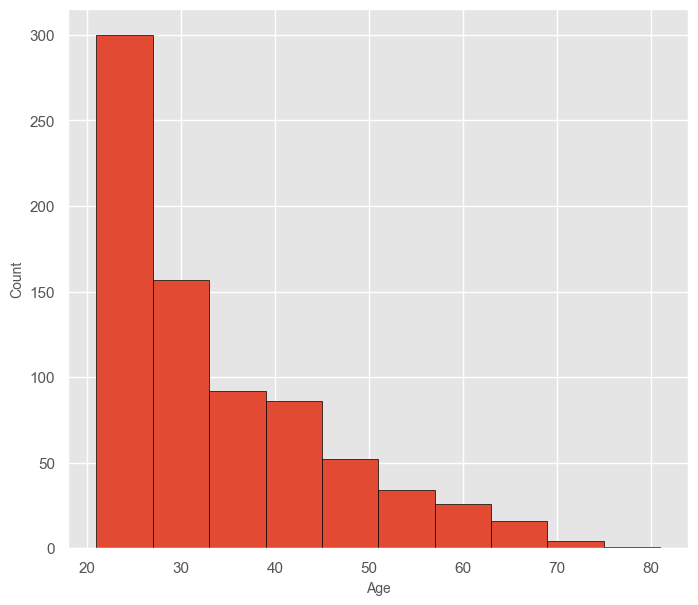

In [10]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="black")

In [11]:
print("MAX AGE: "+str(df['Age'].max()))
print("MIN AGE: "+str(df['Age'].min()))

MAX AGE: 81
MIN AGE: 21


<Axes: xlabel='Age', ylabel='Density'>

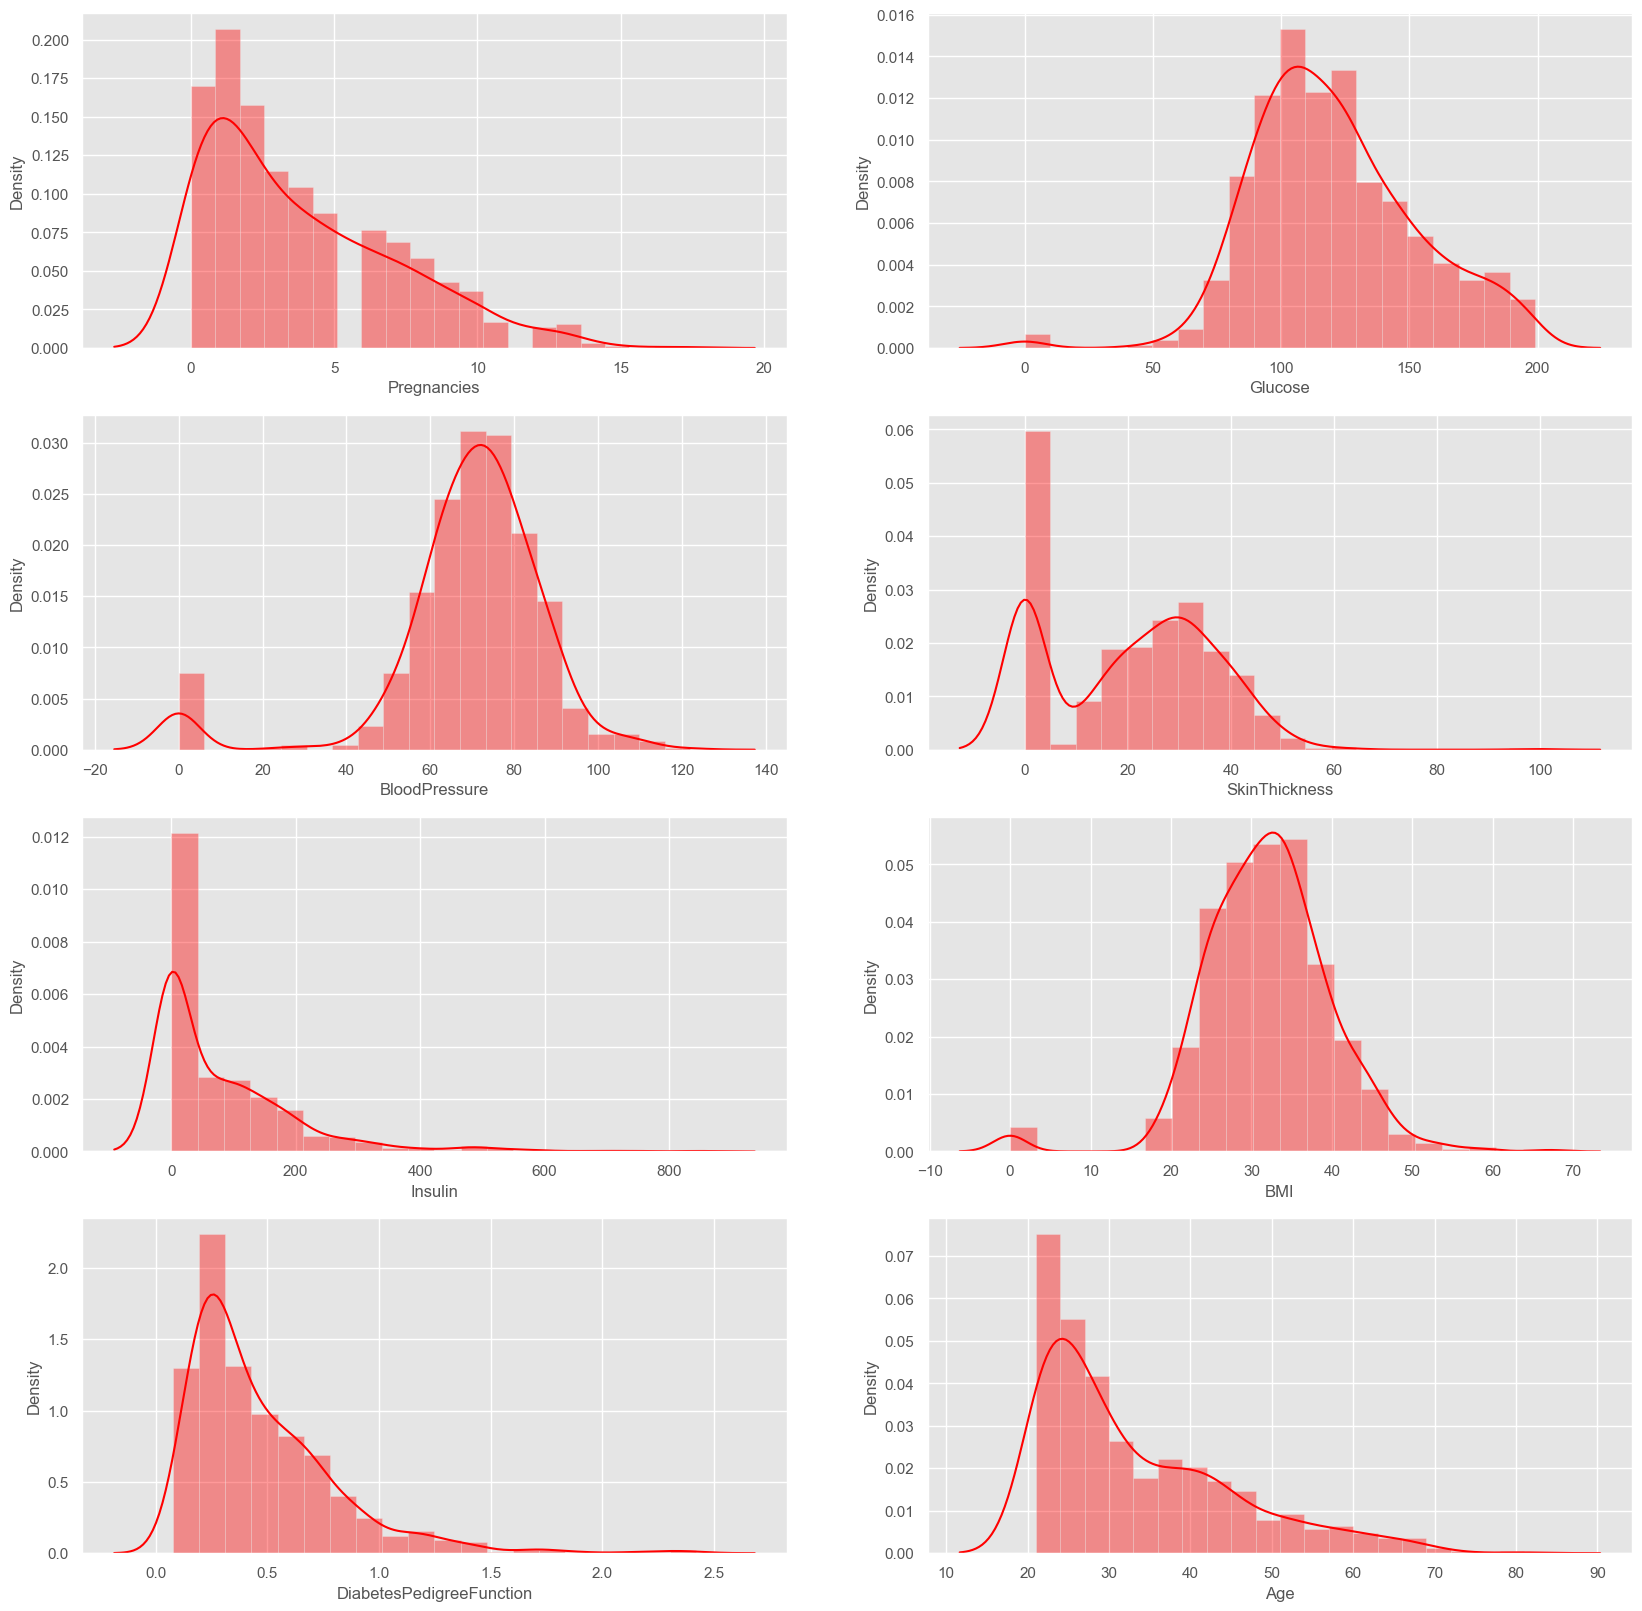

In [13]:
# Create a 4x2 grid of subplots with a large figure size (20x20 inches)
fig, ax = plt.subplots(4, 2, figsize=(20, 20))

# Plot distribution of Pregnancies in the first subplot (top-left)
sns.distplot(df.Pregnancies, bins=20, ax=ax[0, 0], color="red")

# Plot distribution of Glucose in the second subplot (top-right)
sns.distplot(df.Glucose, bins=20, ax=ax[0, 1], color="red")

# Plot distribution of BloodPressure in the third subplot (second row left)
sns.distplot(df.BloodPressure, bins=20, ax=ax[1, 0], color="red")

# Plot distribution of SkinThickness in the fourth subplot (second row right)
sns.distplot(df.SkinThickness, bins=20, ax=ax[1, 1], color="red")

# Plot distribution of Insulin in the fifth subplot (third row left)
sns.distplot(df.Insulin, bins=20, ax=ax[2, 0], color="red")

# Plot distribution of BMI in the sixth subplot (third row right)
sns.distplot(df.BMI, bins=20, ax=ax[2, 1], color="red")

# Plot distribution of DiabetesPedigreeFunction in the seventh subplot (bottom-left)
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3, 0], color="red")

# Plot distribution of Age in the eighth subplot (bottom-right)
sns.distplot(df.Age, bins=20, ax=ax[3, 1], color="red")

In [27]:
# Group the DataFrame 'df' by the values in the "Outcome" column
# Then calculate the mean (average) of the "Pregnancies" column for each group
df.groupby("Outcome").agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.736000
1,5.574627


In [15]:
# Group the DataFrame 'df' by the "Outcome" column
# Then find the maximum value in the "Pregnancies" column for each group
df.groupby("Outcome").agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,13
1,17


In [16]:
# Group the DataFrame 'df' by the "Outcome" column
# Then calculate the average (mean) Glucose level for each group
df.groupby("Outcome").agg({'Glucose':'mean'})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [17]:
# 1. Group the DataFrame by the 'Outcome' column (typically 0=non-diabetic, 1=diabetic)
# 2. For each group, calculate the maximum glucose level observed
df.groupby("Outcome").agg({'Glucose':'max'})

,Glucose
Outcome,
0,197
1,199


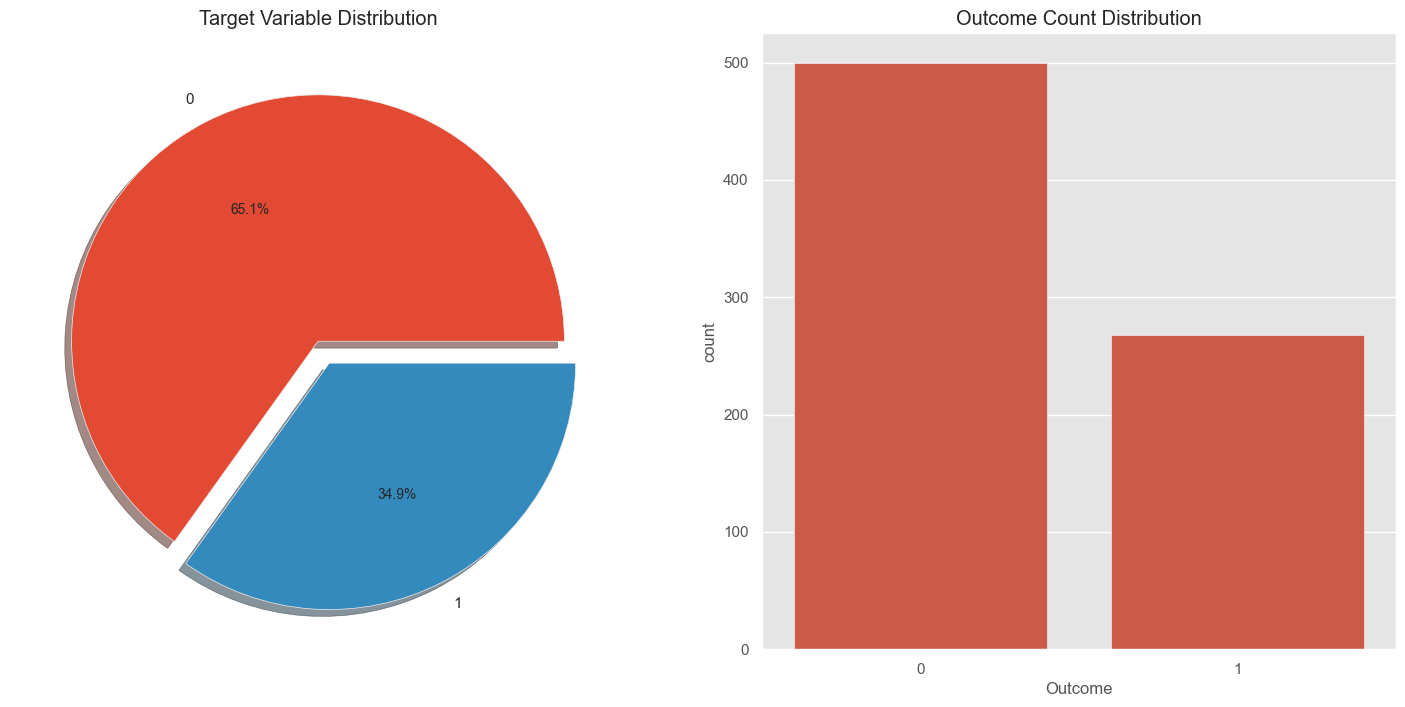

In [18]:
# Create a 1x2 subplot grid with large figure size (18x8 inches)
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# First plot: Pie chart of Outcome distribution
df['Outcome'].value_counts().plot.pie(
    explode=[0, 0.1],        # Pulls out the second slice (Outcome=1) by 10%
    autopct="%1.1f%%",      # Shows percentages with 1 decimal place
    ax=ax[0],               # Places pie chart in first subplot position
    shadow=True             # Adds 3D shadow effect
)
ax[0].set_title('Target Variable Distribution')  # Sets title for pie chart
ax[0].set_ylabel('')        # Removes default y-axis label (not needed for pie charts)

# Second plot: Countplot of Outcome
sns.countplot(
    x='Outcome',            # Uses Outcome column for x-axis
    data=df,                # Uses the DataFrame df
    ax=ax[1]               # Places countplot in second subplot position
)
ax[1].set_title('Outcome Count Distribution')  # Sets title for countplot

# Display both plots
plt.show()

In [28]:
# Calculate and display the correlation matrix for numerical columns in the DataFrame
# The correlation matrix shows how strongly each pair of numerical features is related
# Values range from -1 (perfect negative correlation) to 1 (perfect positive correlation)
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.176302,0.256749,0.141004,0.147174,0.115098,0.000826,0.527049,0.291270
Glucose,0.176302,1.000000,0.225141,0.229289,0.543188,0.236171,0.138353,0.268910,0.495990
BloodPressure,0.256749,0.225141,1.000000,0.199349,0.116425,0.286399,-0.001443,0.325135,0.174469
SkinThickness,0.141004,0.229289,0.199349,1.000000,0.237531,0.566086,0.106280,0.129537,0.295138
Insulin,0.147174,0.543188,0.116425,0.237531,1.000000,0.289534,0.144405,0.162335,0.500678
BMI,0.115098,0.236171,0.286399,0.566086,0.289534,1.000000,0.152771,0.027849,0.315577
DiabetesPedigreeFunction,0.000826,0.138353,-0.001443,0.106280,0.144405,0.152771,1.000000,0.033561,0.173844
Age,0.527049,0.268910,0.325135,0.129537,0.162335,0.027849,0.033561,1.000000,0.238356
Outcome,0.291270,0.495990,0.174469,0.295138,0.500678,0.315577,0.173844,0.238356,1.000000


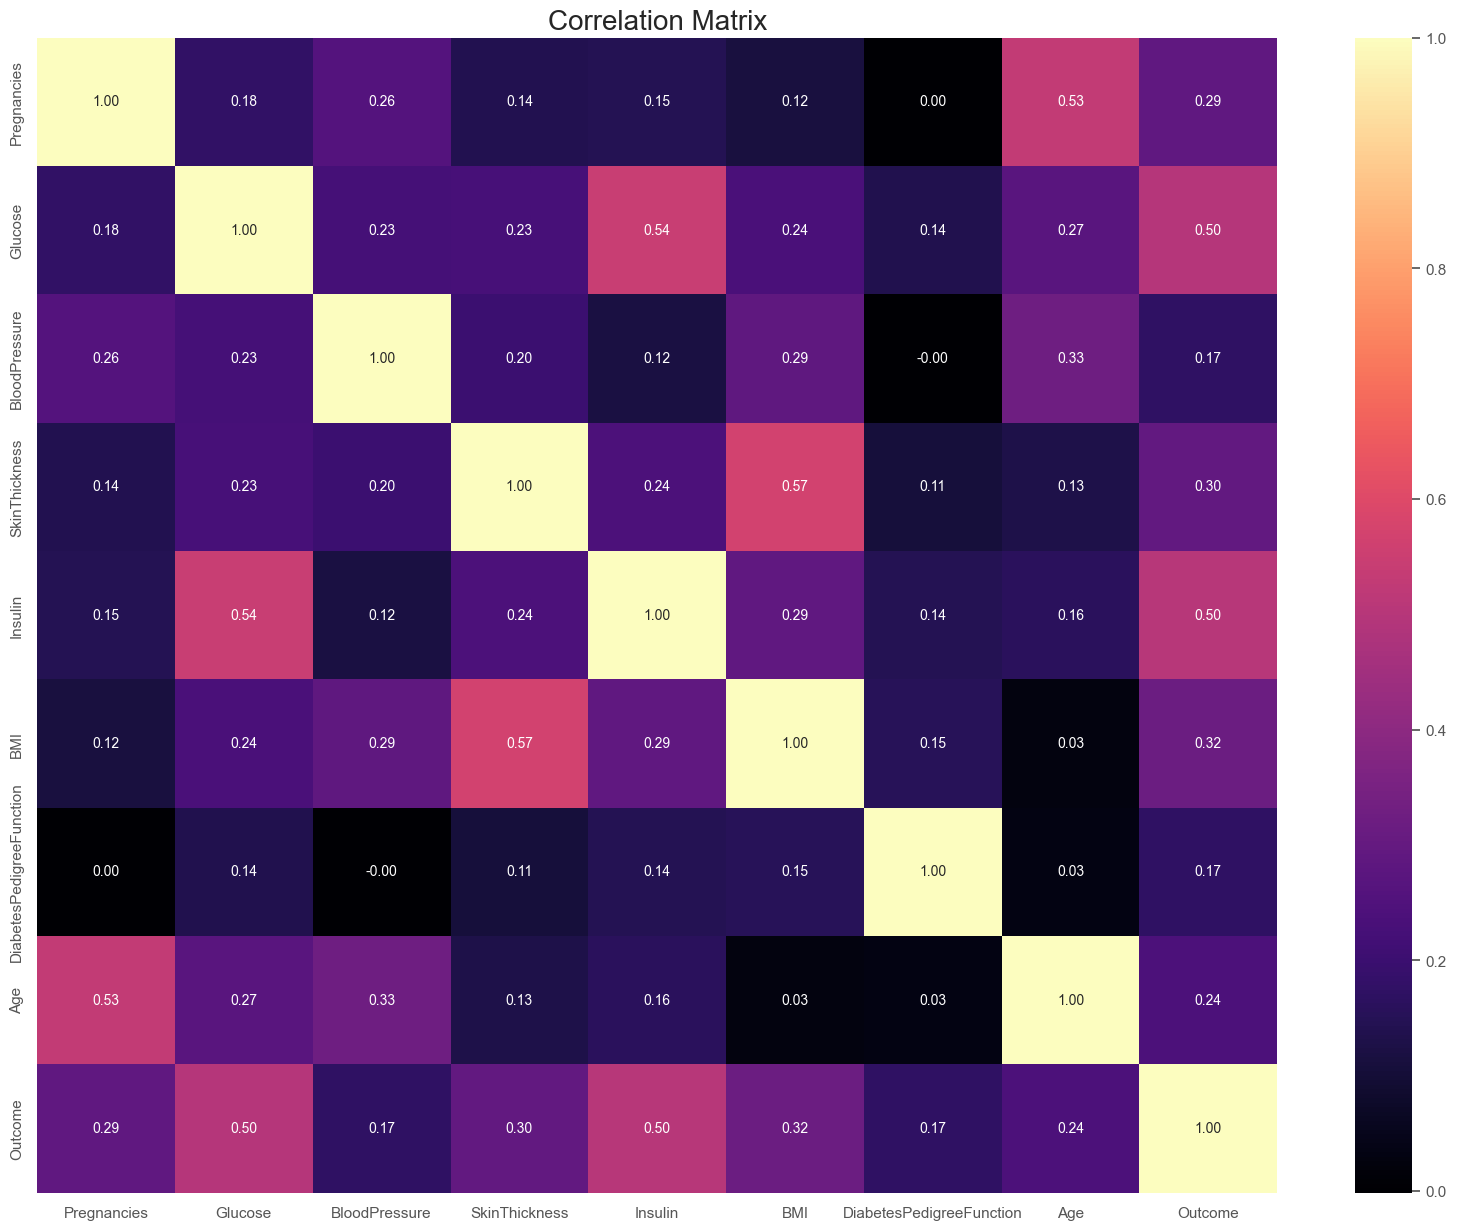

In [29]:
# Creates a large heatmap (20x15 inches) showing correlation between all numerical features
f, ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt='.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [30]:
# Replace all 0 values with NaN (Not a Number) for selected columns
# This is useful if 0 represents missing or invalid data for these specific features
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                                                    'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.nan)

**Data preprocessing**

In [8]:
# Check for missing values in each column of the DataFrame
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: >

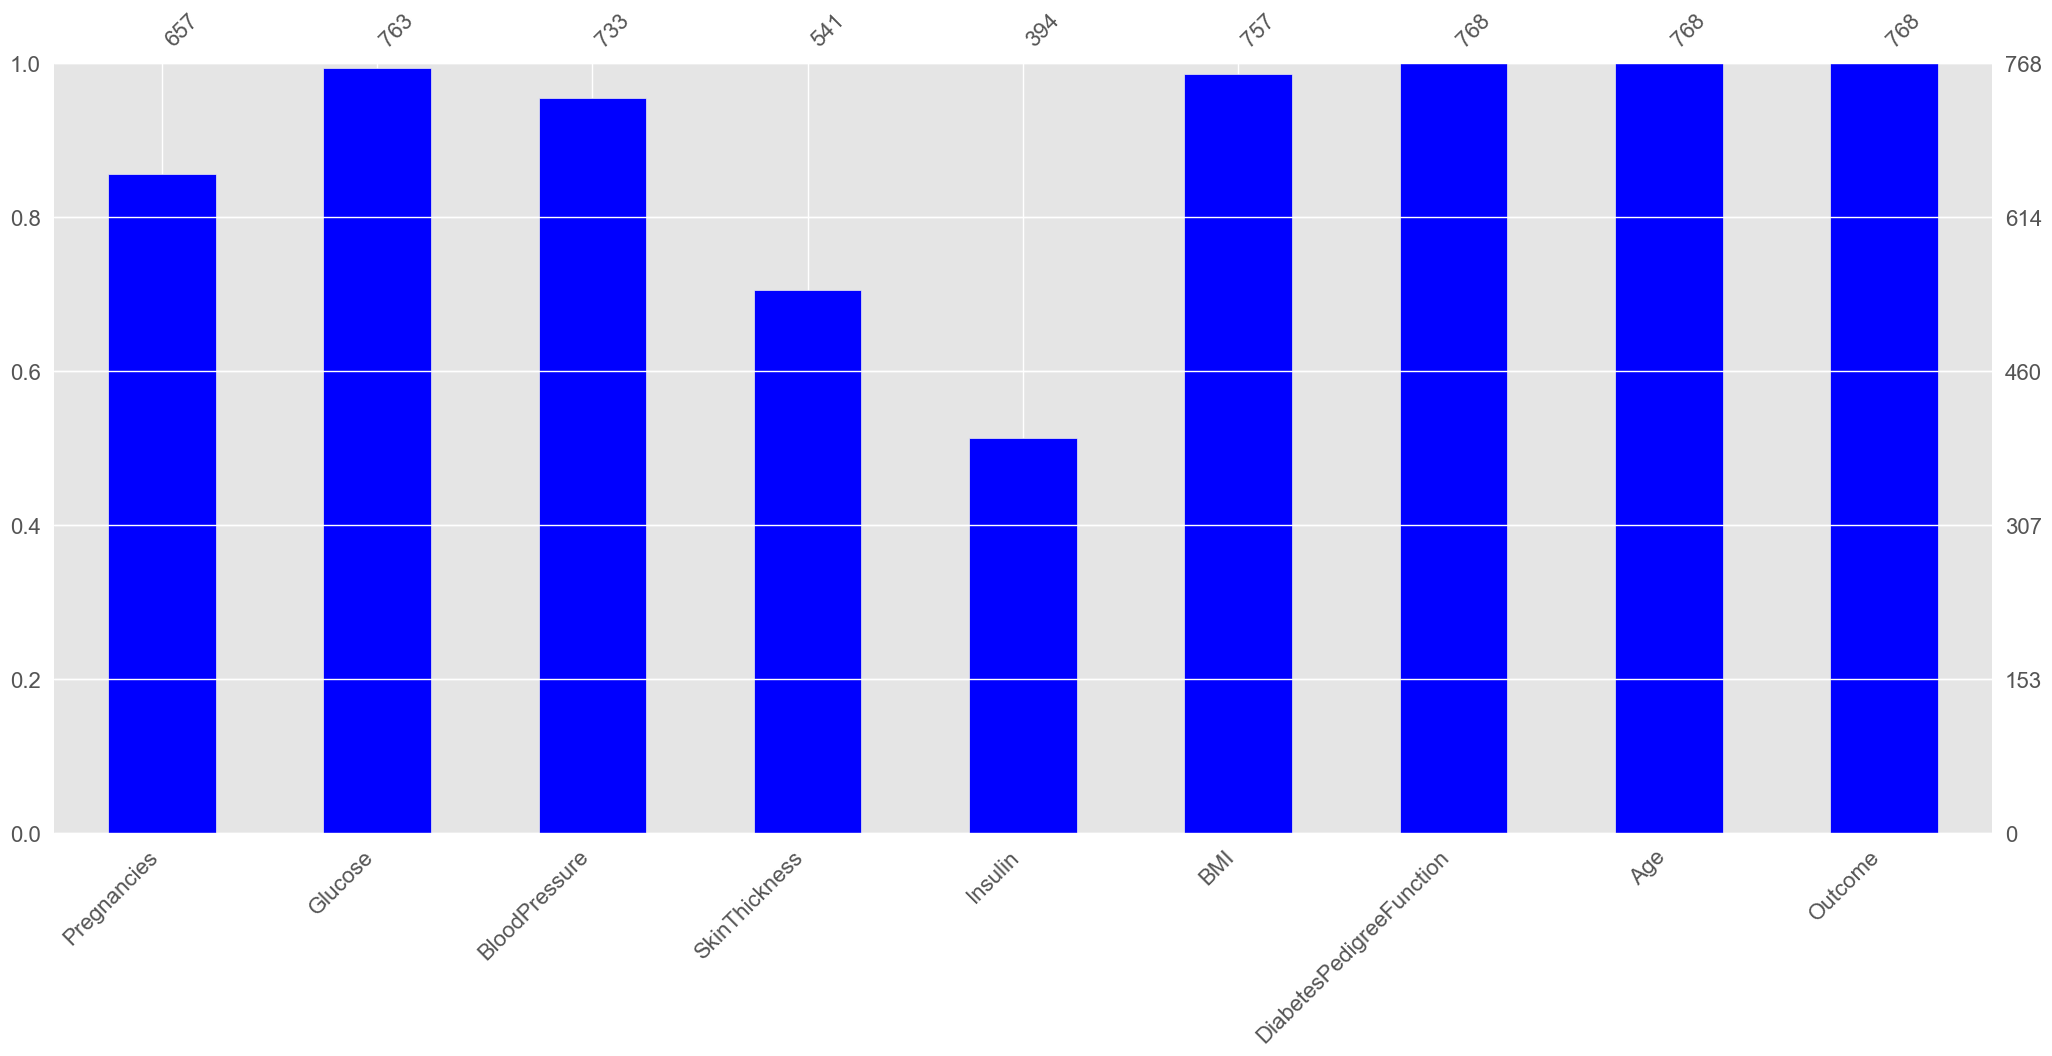

In [9]:
# Visualize missing values in the DataFrame using a bar chart
import missingno as msno
msno.bar(df, color="blue")

In [11]:
# Calculate median of 'var' grouped by Outcome  
def median_target(var):   
    temp = df[df[var].notnull()]  # Drop missing values  
    return temp.groupby('Outcome')[[var]].median().reset_index()  

In [12]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [13]:
# Check for missing values in each column of the DataFrame
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

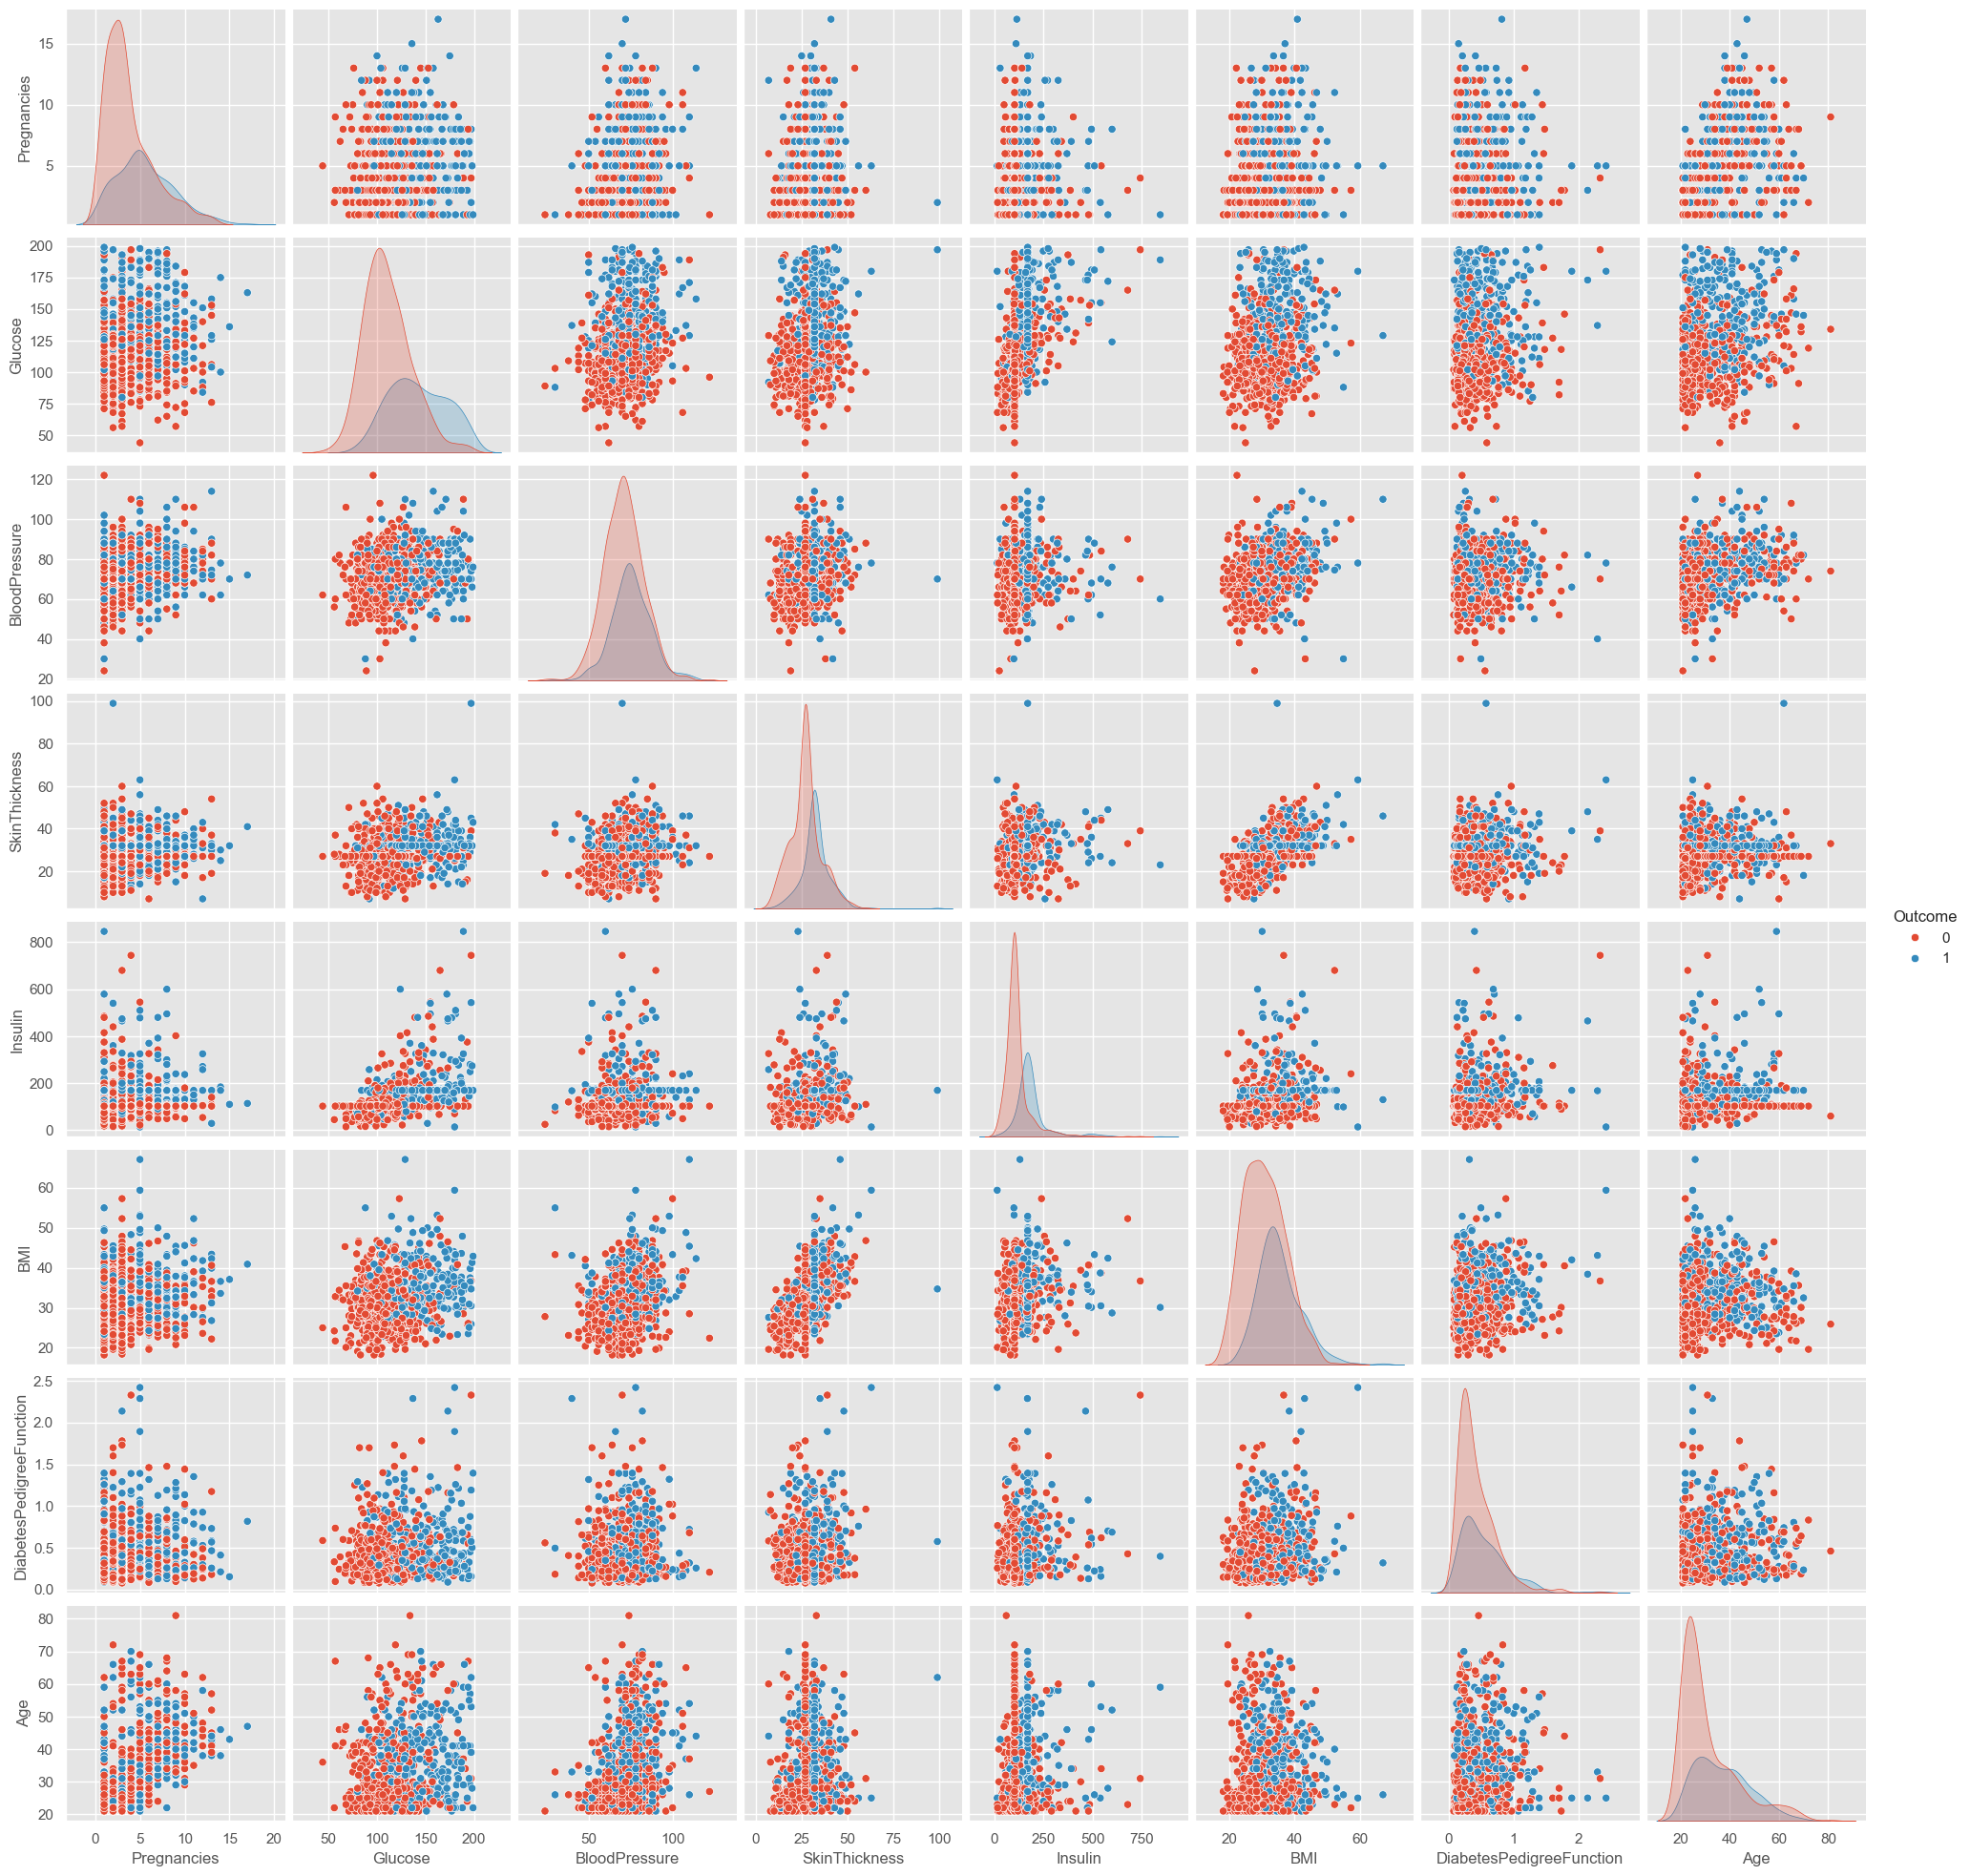

In [14]:
# pair plot
p = sns.pairplot(df, hue="Outcome")

In [15]:
# Check each feature for outliers using IQR method
for feature in df:
    Q1 = df[feature].quantile(0.25)  # 25th percentile (Q1)
    Q3 = df[feature].quantile(0.75)  # 75th percentile (Q3)
    IQR = Q3 - Q1  # Interquartile range
    lower = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper = Q3 + 1.5 * IQR  # Upper bound for outliers
    
    # Check if any values exceed bounds
    if df[(df[feature] > upper)].any(axis=None):
        print(feature, "yes")  # Has outliers
    else:
        print(feature, "no")   # No outliers

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<Axes: xlabel='Insulin'>

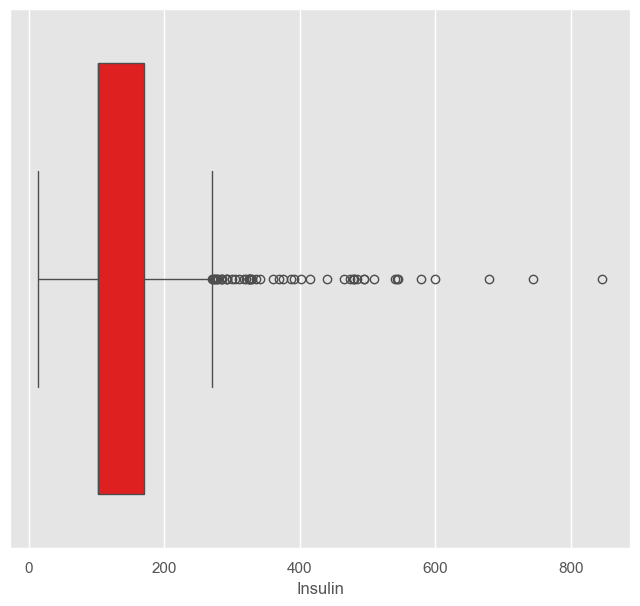

In [16]:
# Create boxplot for Insulin values
plt.figure(figsize=(8,7))  # Set figure size (width, height)
sns.boxplot(x=df["Insulin"], color="red")  # Red boxplot showing distribution

In [17]:
# Calculate IQR bounds for Insulin
Q1 = df.Insulin.quantile(0.25)  # First quartile (25th percentile)
Q3 = df.Insulin.quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1                   # Interquartile range

# Define outlier thresholds (1.5*IQR rule)
lower = Q1 - 1.5 * IQR          # Lower bound
upper = Q3 + 1.5 * IQR          # Upper bound 

# Cap outliers at upper bound
df.loc[df['Insulin'] > upper, 'Insulin'] = upper  # Replace values > upper with upper

<Axes: xlabel='Insulin'>

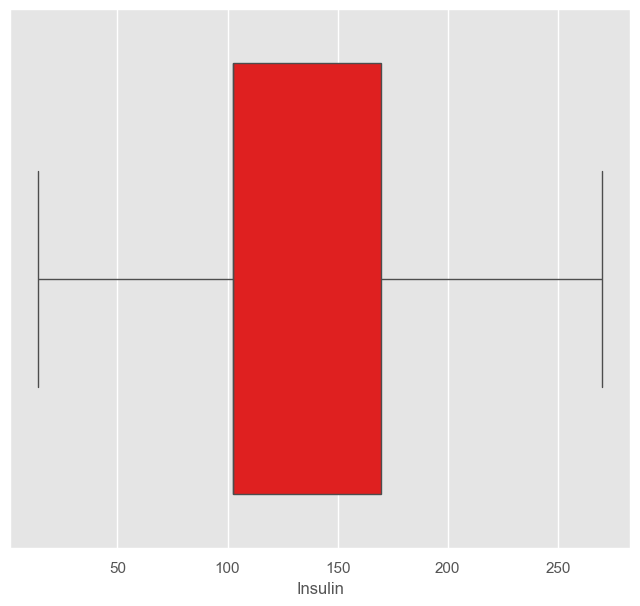

In [18]:
# Create boxplot for Insulin values
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

In [19]:
# Detect outliers using Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)  # Init LOF with 10 neighbors
lof.fit_predict(df)  # Fit model and predict outliers (-1=outlier, 1=inlier)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

**Feature Enginnering**

In [31]:
# Categorize BMI values into different weight classes based on standard BMI ranges

# If BMI is less than 18.5, classify as 'Underweight'
df.loc[df["BMI"] < 18.5, "NewBMI"] = "Underweight"

# If BMI is between 18.5 and 24.9, classify as 'Normal'
df.loc[(df["BMI"] >= 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = "Normal"

# If BMI is between 25 and 29.9, classify as 'Overweight'
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = "Overweight"

# If BMI is between 30 and 34.9, classify as 'Obesity 1'
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = "Obesity 1"

# If BMI is between 35 and 39.9, classify as 'Obesity 2'
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = "Obesity 2"

# If BMI is greater than 39.9, classify as 'Obesity 3'
df.loc[df["BMI"] > 39.9, "NewBMI"] = "Obesity 3"

# Convert the 'NewBMI' column to a categorical data type for better memory usage and analysis
df["NewBMI"] = df["NewBMI"].astype("category")

In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [34]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [35]:
# Apply the function 'set_insuline' to each row of the DataFrame
# The function is applied across each row (axis=1), and the results are stored in a new column 'NewInsulinScore'
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [38]:
# Categorizing Glucose levels into predefined groups
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [42]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


In [39]:
# Apply one-hot encoding to the specified categorical columns: 'NewBMI', 'NewInsulinScore', 'NewGlucose'
# One-hot encoding creates binary columns for each category, which helps convert categorical data into numerical form
df = pd.get_dummies(df, columns=["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)

In [40]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,True,False,False,False,False,False,False,False,False,True
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,False,False,True,False,True,False,True,False,False
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,False,False,False,False,False,False,False,False,False,True
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,False,False,True,False,True,False,True,False,False
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,False,True,False,False,False,False,False,False,True


In [41]:
categorical_df = df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [42]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,True,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,True,False,True,False,True,False,False
4,False,False,True,False,False,False,False,False,False,True


In [43]:
# Prepare data for modeling:
y = df['Outcome']  # Target variable (0/1 for diabetes classification)

# Feature selection - keep original features, drop:
# - Outcome (target)
# - Engineered BMI categories 
# - Engineered Insulin/Glucose categories
X=df.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)

In [44]:
# Store column names and index for later reference
cols = X.columns  # Gets feature names 
index = X.index  

In [45]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [46]:
from sklearn.preprocessing import RobustScaler
# Scale features using RobustScaler 
transformer = RobustScaler().fit(X)  # Fit scaler to training data
X = transformer.transform(X)         # Transform features using median/IQR scaling
# Convert back to DataFrame with original column names and indices
X = pd.DataFrame(X, columns=cols, index=index)  

In [47]:
# Combine scaled numerical features (X) with categorical features
X = pd.concat([X, categorical_df], axis=1)  

In [48]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.75,0.765432,0.000,1.000000,1.000000,0.170330,0.665359,1.235294,True,False,False,False,False,False,False,False,False,True
1,-0.50,-0.790123,-0.375,0.142857,0.000000,-0.598901,-0.056209,0.117647,False,False,False,True,False,True,False,True,False,False
2,1.25,1.629630,-0.500,0.571429,1.000000,-0.961538,0.783007,0.176471,False,False,False,False,False,False,False,False,False,True
3,-0.50,-0.691358,-0.375,-0.714286,-0.126866,-0.434066,-0.537255,-0.470588,False,False,False,True,False,True,False,True,False,False
4,0.50,0.493827,-2.000,1.000000,0.977612,1.214286,5.007843,0.235294,False,False,True,False,False,False,False,False,False,True


In [49]:
# Split data into training (80%) and test sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
# Standardize features by removing mean and scaling to unit variance
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)        

**logistic regression**

In [60]:
# Initialize and train logistic regression model
log_reg = LogisticRegression()  
log_reg.fit(X_train, y_train)  

LogisticRegression()

In [61]:
# Generate predictions on test set
y_pred = log_reg.predict(X_test) 

In [62]:
# Calculate training accuracy
accuracy_score(y_train, log_reg.predict(X_train))  # Compare predictions vs actual labels

0.8517915309446255

In [63]:
# Calculate and store test accuracy
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))  # Real-world performance metric

In [64]:
# Generate confusion matrix to evaluate classification performance
confusion_matrix(y_test, y_pred)  

array([[97, 10],
       [ 7, 40]])

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       107
           1       0.80      0.85      0.82        47

    accuracy                           0.89       154
   macro avg       0.87      0.88      0.87       154
weighted avg       0.89      0.89      0.89       154



**K-Nearest Neighbors**

In [66]:
# K-Nearest Neighbors (KNN) Classifier

# Initialize and train KNN model
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train)     
# Generate predictions
y_pred = knn.predict(X_test)  # Predict on test set

# Evaluate performance
print("Training Accuracy:", accuracy_score(y_train, knn.predict(X_train)))  # Accuracy on training data
knn_acc = accuracy_score(y_test, y_pred)  # Store test accuracy
print("Test Accuracy:", knn_acc)         

# Detailed evaluation metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))  

print("\nClassification Report:")
print(classification_report(y_test, y_pred))  

Training Accuracy: 0.8713355048859935
Test Accuracy: 0.9025974025974026

Confusion Matrix:
[[100   7]
 [  8  39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       107
           1       0.85      0.83      0.84        47

    accuracy                           0.90       154
   macro avg       0.89      0.88      0.88       154
weighted avg       0.90      0.90      0.90       154



**Support Vector Machine**

In [67]:
# Support Vector Machine (SVM) with hyperparameter tuning

# Initialize SVM classifier with probability estimates enabled
svc = SVC(probability=True)  # Allows predict_proba() later

# Define hyperparameter grid for tuning
parameter = {
    "gamma": [0.0001, 0.001, 0.01, 0.1],  
    'C': [0.01, 0.05, 0.5, 1, 10, 15, 20]  
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svc, parameter)  
grid_search.fit(X_train, y_train)  # Find best hyperparameters

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [68]:
# best_parameter
grid_search.best_params_

{'C': 20, 'gamma': 0.01}

In [69]:
grid_search.best_score_

np.float64(0.8598960415833667)

In [70]:
svc = SVC(C=10, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(accuracy_score(y_test, svc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8859934853420195
0.9155844155844156
[[100   7]
 [  6  41]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       107
           1       0.85      0.87      0.86        47

    accuracy                           0.92       154
   macro avg       0.90      0.90      0.90       154
weighted avg       0.92      0.92      0.92       154



**Decision Tree**

In [71]:
# Initialize and train Decision Tree model
DT = DecisionTreeClassifier()  # Uses default parameters 
DT.fit(X_train, y_train)       # Build tree from training data

# Generate predictions
y_pred = DT.predict(X_test)    # Predict class labels

# Evaluate model performance
print("Training Accuracy:", accuracy_score(y_train, DT.predict(X_train)))  # Accuracy on training set
print("Test Accuracy:", accuracy_score(y_test, y_pred))                    # Accuracy on test set

# Detailed performance metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))  # [[TN, FP], [FN, TP]]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))  # Precision, recall, f1-score

Training Accuracy: 1.0
Test Accuracy: 0.7922077922077922

Confusion Matrix:
[[85 22]
 [10 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       107
           1       0.63      0.79      0.70        47

    accuracy                           0.79       154
   macro avg       0.76      0.79      0.77       154
weighted avg       0.81      0.79      0.80       154



**Decision Tree tuning**

In [72]:
# Define hyperparameter grid for Decision Tree tuning
grid_param = {
    'criterion': ['gini', 'entropy'],       # Splitting quality measures
    'max_depth': [3, 5, 7, 10],             # Tree depth limits
    'splitter': ['best', 'random'],          # Node splitting strategies
    'min_samples_leaf': [1, 2, 3, 5, 7],    # Minimum samples per leaf
    'min_samples_split': [1, 2, 3, 5, 7],   # Minimum samples to split node
    'max_features': ['auto', 'sqrt', 'log2'] # Features to consider at each split
}

# Setup GridSearchCV with extensive tuning
grid_search_dt = GridSearchCV(
    DT,                     
    grid_param,             
    cv=50,                  
    n_jobs=-1,              
    verbose=1               
)

# Execute grid search
grid_search_dt.fit(X_train, y_train)  # Find optimal parameters

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [73]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 7,
 'min_samples_split': 5,
 'splitter': 'best'}

In [74]:
grid_search_dt.best_score_

np.float64(0.8639743589743589)

In [75]:
DT = grid_search_dt.best_estimator_
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))
dt_acc = accuracy_score(y_test, DT.predict(X_test))
print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8778501628664495
0.7987012987012987
[[84 23]
 [ 8 39]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.84       107
           1       0.63      0.83      0.72        47

    accuracy                           0.80       154
   macro avg       0.77      0.81      0.78       154
weighted avg       0.83      0.80      0.80       154



**Random Forest classifier**

In [76]:
# Initialize and train Random Forest classifier with specified hyperparameters
rand_clf = RandomForestClassifier(
    criterion='entropy',    
    max_depth=15,           
    max_features=0.75,      
    min_samples_leaf=2,     
    min_samples_split=3,    
    n_estimators=130        
)

# Train model on scaled training data
rand_clf.fit(X_train, y_train)  # Build 130 decision trees with specified constraints

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [77]:
# Make predictions on test set
y_pred = rand_clf.predict(X_test)  # Predict class labels (0/1) for test data

# Evaluate model performance
print("Training Accuracy:", accuracy_score(y_train, rand_clf.predict(X_train)))  # Accuracy on training data
rand_acc = accuracy_score(y_test, y_pred)  # Store test accuracy for comparison
print("Test Accuracy:", rand_acc)          # Accuracy on unseen test data

# Detailed performance metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))  # [[True Negatives, False Positives],
                                         #  [False Negatives, True Positives]]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))  # Precision, recall, f1-score, support per class

Training Accuracy: 0.993485342019544
Test Accuracy: 0.9025974025974026

Confusion Matrix:
[[98  9]
 [ 6 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       107
           1       0.82      0.87      0.85        47

    accuracy                           0.90       154
   macro avg       0.88      0.89      0.89       154
weighted avg       0.90      0.90      0.90       154



**Gradient Boosting Classifier**

In [78]:
# Initialize Gradient Boosting Classifier
gbc = GradientBoostingClassifier()  # Uses default parameters initially

# Define hyperparameter grid for tuning
parameters = {
    'loss': ['deviance', 'exponential'],  
    'learning_rate': [0.001, 0.1, 1, 10],  
    'n_estimators': [100, 150, 180, 200]   
}

# Set up GridSearch with 10-fold CV
grid_search_gbc = GridSearchCV(
    gbc,                    
    parameters,              
    cv=10,                   
    n_jobs=-1,               
    verbose=1                
)

# Execute grid search
grid_search_gbc.fit(X_train, y_train)  # Find optimal hyperparameters

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [79]:
grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 200}

In [80]:
# Initialize and train Gradient Boosting Classifier with optimized parameters
gbc = GradientBoostingClassifier(
    learning_rate=0.1,       
    loss='exponential',      
    n_estimators=150         
)

# Train model on the preprocessed data
gbc.fit(X_train, y_train)   # Build sequential decision trees with boosting

GradientBoostingClassifier(loss='exponential', n_estimators=150)

In [81]:
# Get best model from GridSearchCV results
gbc = grid_search_gbc.best_estimator_  # Optimal GBC with tuned hyperparameters

# Generate predictions on test set
y_pred = gbc.predict(X_test)  # Predicted class labels (0/1)

# Evaluate model performance
print("Training Accuracy:", accuracy_score(y_train, gbc.predict(X_train)))  # Performance on training data
gbc_acc = accuracy_score(y_test, y_pred)  # Store test accuracy
print("Test Accuracy:", gbc_acc)          # Performance on unseen data

# Detailed evaluation metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))  # [[TN, FP], [FN, TP]]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))  # Precision/Recall/F1 for each class

Training Accuracy: 1.0
Test Accuracy: 0.922077922077922

Confusion Matrix:
[[98  9]
 [ 3 44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       107
           1       0.83      0.94      0.88        47

    accuracy                           0.92       154
   macro avg       0.90      0.93      0.91       154
weighted avg       0.93      0.92      0.92       154



**XGBoost Classifier**

In [82]:
# Initialize XGBoost Classifier for binary classification
from xgboost import XGBClassifier 
xgb = XGBClassifier(
    objective='binary:logistic',  
    learning_rate=0.01,          
    max_depth=10,                
    n_estimators=180            
)

# Train model 
xgb.fit(
    X_train,  # Training features
    y_train,   # Training labels
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
# Generate predictions on test set
y_pred = xgb.predict(X_test) 

# Evaluate model performance
print("Training Accuracy:", accuracy_score(y_train, xgb.predict(X_train)))  
xgb_acc = accuracy_score(y_test, y_pred) 
print("Test Accuracy:", xgb_acc)          

# Detailed performance metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))  
                                
print("\nClassification Report:")
print(classification_report(y_test, y_pred))  # Shows precision, recall, f1-score, support

Training Accuracy: 0.9739413680781759
Test Accuracy: 0.8961038961038961

Confusion Matrix:
[[100   7]
 [  9  38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       107
           1       0.84      0.81      0.83        47

    accuracy                           0.90       154
   macro avg       0.88      0.87      0.88       154
weighted avg       0.90      0.90      0.90       154



In [84]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dt_acc,4), 100*round(rand_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,Gradient Boosting Classifier,92.21
2,SVM,91.56
1,KNN,90.26
4,Random Forest Classifier,90.26
6,XgBoost,89.61
0,Logistic Regression,88.96
3,Decision Tree Classifier,79.87


In [ ]:
#save the model
import pickle
model = gbc
pickle.dump(model, open(".\saved_models\diabetes.pkl",'wb'))

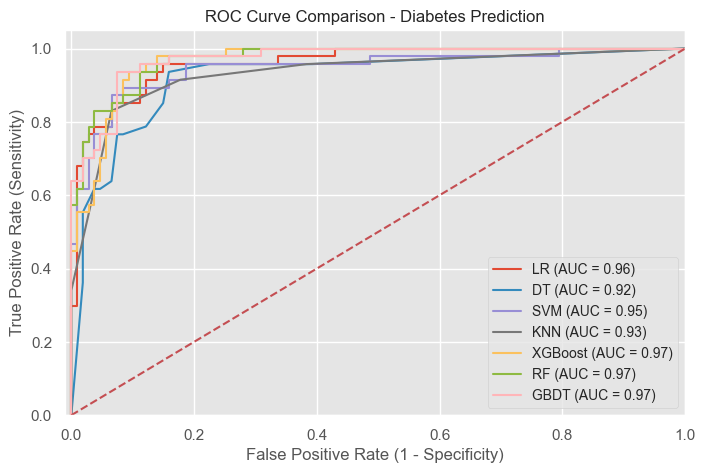

In [86]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Set up figure
plt.figure(figsize=(8,5))

# Define models to compare
models = [
    {'label': 'LR', 'model': log_reg},    # Logistic Regression
    {'label': 'DT', 'model': DT},         # Decision Tree
    {'label': 'SVM', 'model': svc},       # Support Vector Machine 
    {'label': 'KNN', 'model': knn},       # K-Nearest Neighbors
    {'label': 'XGBoost', 'model': xgb},   # XGBoost
    {'label': 'RF', 'model': rand_clf},   # Random Forest
    {'label': 'GBDT', 'model': gbc},      # Gradient Boosting
]

# Generate ROC curves for each model
for m in models:
    model = m['model']
    model.fit(X_train, y_train)  # Re-fit model (optional, could use pre-fitted)
    y_pred = model.predict(X_test)
    
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = metrics.roc_curve(
        y_test, 
        model.predict_proba(X_test)[:,1]  # Probability of positive class
    )
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (m['label'], auc))

# Add reference line and format plot
plt.plot([0, 1], [0, 1], 'r--')  # Random classifier line
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('ROC Curve Comparison - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=10)

# Save high-quality image
plt.savefig("roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[88.96, 79.86999999999999, 91.56, 90.25999999999999, 89.61, 90.25999999999999, 92.21000000000001]
[np.float64(87.88), np.float64(79.84), np.float64(90.35), np.float64(88.22), np.float64(87.15), np.float64(89.41), np.float64(93.07)]


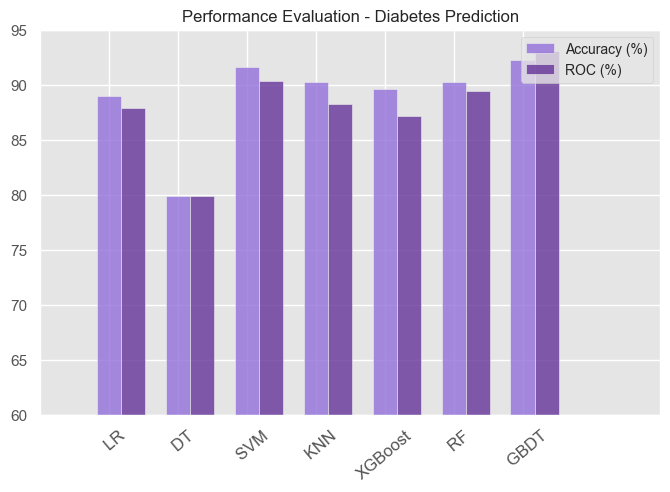

In [87]:
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(dt_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(rand_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([60, 95])

plt.title('Performance Evaluation - Diabetes Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()